# Ý tưởng phương pháp 

# Ý tưởng thuật toán: 

**INPUT**: Ma trận $\mathbf{A}$.\
**OUTPUT**: Ma trận $\mathbf{U}$, hoặc thông báo $\mathbf{A}$ không đối xứng, hoặc thông báo $\mathbf{A}$ không xác định dương. 

- Lưu ý: Trong thuật toán này, ta sẽ không lưu $\mathbf{U}$ vào một mảng riêng mà sẽ lưu $\mathbf{U}$ (ma trận tam giác trên) vào phía trên của A vì hai công thức cần tính toán chỉ sử dụng các $a_{ij}$ với $i < j$ (tức là chỉ sử dụng các phần tử của ma trận tam giác trên của A), và vì mỗi công thức tính $r_{ij}$ đều chỉ sử dụng $i - 1$ hàng trên đó, nên cứ sau khi tính xong $r_{ij}$ ta sẽ thế chỗ luôn phần tử $a_{ij}$ ở phía ma trận tam giác trên của $\mathbf{A}$).

- Thuật toán (Cholesky's Algorithm): 

Bước 1: for $i = 1$ to $n$:\
Bước 2: Tính phần tử đường chéo chính $a_{ii}$ (chú ý chưa lấy căn bậc 2)\
Bước 3: Nếu $a_{ii} \leq 0 \Rightarrow$ Output: $\mathbf{A}$ không xác định dương => dừng thuật toán\
Bước 4: Lấy căn bậc hai của $a_{ii}$\
Bước 5: Tính các phần tử còn lại của hàng $i$ kể từ sau phần tử đường chéo chính $a_{ii}$ 

# Cài đặt thuật toán: 

In [ ]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt 

### Hàm kiểm tra tính đối xứng của ma trận , nếu không đối xứng thì trả về False, ngược lại trả về True. 

- **INPUT**: Ma trận $\mathbf{A}$ cần kiểm tra tính đối xứng. 
- **OUPUT**: flag (True hoặc False)

In [ ]:
def symmetryCheck(A): 
    n = len(A)
    flag = True
    
    for i in range(n): 
        for j in range(i): # không kiểm tra các phần tử đường chéo chính có bằng chính nó hay không.  
            if A[i][j] != A[j][i]: 
                flag = False 
                break 
    
    return flag 

### Hàm thực thi chính của thuật toán Cholesky, trả về ma trận tam giác trên $\mathbf{U}$ hoặc thông báo $\mathbf{A}$ không xác định dương, hoặc $\mathbf{A}$ không đối xứng. 

In [ ]:
def ChoLKDecom(A): 
    n = len(A)
    
    # Bước 1: Kiểm tra tính đối xứng của ma trận A. 
    flag = symmetryCheck(A)
    if flag == False: 
        return ('Ma trận A không xác định dương do A không phải là ma trận đối xứng.')
    
    # Bước 2: Tính bình phương của phần tử đường chéo chính a_ii
    for i in range(n): 
        for k in range(i): 
            A[i][i] = A[i][i] - A[k][i]**2 # đoạn này có thể lấy inner product cho nhanh. 
            
        # Bước 3: Xét dấu của a_ii. 
        # Nếu a_ii <= 0 thì dừng thuật toán
        if A[i][i] <= 0: 
            return ("A không xác định dương do phần tử A[%d][%d] = %f <= 0" %(i, i, A[i][i]))
        
        # Ngược lại thì lấy căn của a_ii. 
        A[i][i] = np.sqrt(A[i][i]) 
            
        # Bước 4: Tính các phần tử a_ij, j = i + 1,..., n.
        for j in range(i + 1, n): 
            for k in range(i): 
                A[i][j] = A[i][j] - A[k][i]*A[k][j]
            
            A[i][j] = A[i][j] / A[i][i]
        
    # Bước 5: trả về ma trận tam giác trên của A. Ta thu được ma trận U. 
    return np.triu(A)

### Một số ví dụ về phân tách Cholesky: 

### Ví dụ 1: 

In [ ]:
A = np.array([[4, -2, 4, 2], 
              [-2, 10, -2, -7], 
              [4, -2, 8, 4], 
              [2, -7, 4, 7]], dtype='float')

NameError: ignored

- Thực hiện với hàm ChoLKDecom vừa định nghĩa ở trên:

In [ ]:
ChoLKDecom(A)

NameError: ignored

- So sánh với hàm cholesky của numpy: 

In [ ]:
np.linalg.cholesky(A)

NameError: ignored

### Ví dụ 2: 

In [ ]:
A = np.array([[16, 4, 8, 4], 
              [4, 10, 8, 4], 
              [8, 8, 12, 10], 
              [4, 4, 10, 12]], dtype='float')

NameError: ignored

In [ ]:
A = np.array([[1, 2, 3], 
              [2, 5, 10], 
              [3, 10, 16]], dtype='float')

NameError: ignored

In [ ]:
ChoLKDecom(A)

NameError: ignored

- So sánh với hàm cholesky của numpy: 

In [ ]:
np.linalg.cholesky(A)

### Ví dụ 3: $\mathbf{A}$ không xác định dương. 

In [ ]:
ChoLKDecom(A)

NameError: ignored

In [ ]:
np.linalg.cholesky(A)

### Ví dụ 4: Thử nhân một ma trận $\mathbf{M}$ khả nghịch với chuyển vị của nó để tạo ra $\mathbf{A}$

In [ ]:
M = np.array([[2, 4, 6, 7], 
              [5, 3, 2, 4], 
              [1, 3, 2, 6], 
              [8, 3, 9, 2]], dtype='float')

NameError: ignored

- Kiểm tra tính khả nghịch của $\mathbf{M}$, nếu thỏa mãn thì nhân với chuyển vị của nó. 

In [ ]:
np.linalg.inv(M)

array([[-1.16666667, -0.52777778,  1.52777778,  0.55555556],
       [ 5.16666667,  3.52777778, -7.52777778, -2.55555556],
       [-0.16666667, -0.36111111,  0.36111111,  0.22222222],
       [-2.33333333, -1.55555556,  3.55555556,  1.11111111]])

- Nhân $\mathbf{M}$ với chuyển vị của nó: 

In [ ]:
A = np.matmul(M.T, M)

In [ ]:
print(A)

[[ 94.  50.  96.  56.]
 [ 50.  43.  63.  64.]
 [ 96.  63. 125.  80.]
 [ 56.  64.  80. 105.]]


- Phân tách Cholesky của $\mathbf{A}$: 

In [ ]:
ChoLKDecom(A)

array([[ 9.69535971,  5.15710623,  9.90164396,  5.77595898],
       [ 0.        ,  4.0502167 ,  2.94704484,  8.44714456],
       [ 0.        ,  0.        ,  4.2746197 , -0.48790378],
       [ 0.        ,  0.        ,  0.        ,  0.21446816]])

- So sánh kết quả với hàm cholesky của numpy: 

In [ ]:
np.linalg.cholesky(A)

array([[ 9.69535971,  0.        ,  0.        ,  0.        ],
       [ 5.15710623,  4.0502167 ,  0.        ,  0.        ],
       [ 9.90164396,  2.94704484,  4.2746197 ,  0.        ],
       [ 5.77595898,  8.44714456, -0.48790378,  0.21446816]])

### Ví dụ 5: Thử với một ma trận 10 $\times$ 10. 

In [ ]:
M = np.array([[10, 32, 43, 27, 61, 42, 90, 33, 74, 35], 
              [21, 32, 47, 21, 78, 31, 23, 45, 32, 17], 
              [12, 25, 34, 76, 20, 34, 43, 11, 51, 67], 
              [34, 45, 36, 74, 12, 29, 41, 65, 98, 12], 
              [16, 24, 64, 31, 72, 34, 45, 18, 39, 43], 
              [12, 24, 36, 87, 45, 57, 36, 92, 89, 35], 
              [45, 98, 37, 47, 21, 25, 68, 49, 34, 29], 
              [48, 24, 19, 29, 37, 76, 56, 19, 36, 98], 
              [17, 74, 81, 23, 45, 38, 76, 17, 91, 83], 
              [45, 44, 38, 71, 65, 24, 63, 75, 24, 25]], dtype='float')

- Kiểm tra tính khả nghịch của $\mathbf{M}$: 

In [ ]:
np.linalg.inv(M)

array([[-0.00680896,  0.00186526, -0.00638907,  0.02226436,  0.0036694 ,
        -0.01892598, -0.0083409 ,  0.01088352, -0.00214929,  0.00903268],
       [ 0.00283658,  0.02500507,  0.01472937, -0.00570977, -0.02126997,
        -0.00336147,  0.01282653, -0.00434116, -0.00089375, -0.01131244],
       [-0.01780048, -0.04720034, -0.03040823,  0.00148682,  0.06364138,
         0.01652922,  0.00949087, -0.00152377,  0.00071046, -0.00220178],
       [ 0.00063136,  0.00319626,  0.01730484,  0.00140245,  0.00298332,
        -0.00228735,  0.00417106, -0.00455197, -0.01086209, -0.00296909],
       [ 0.01069568,  0.04224231,  0.02281897, -0.00107644, -0.03471458,
        -0.01560719, -0.01010844, -0.00275093, -0.00083416,  0.00250113],
       [ 0.00139216, -0.01908973, -0.01378948, -0.00334479,  0.04359395,
         0.01823835,  0.02575995,  0.00768401, -0.02427027, -0.03034755],
       [ 0.01103889, -0.02297515, -0.00850958, -0.00338365,  0.01208725,
         0.00187111,  0.00301812, -0.00040642

In [ ]:
np.linalg.det(M)

2.3727348858157942e+17

- Nhân $\mathbf{M}$ với chuyển vị của nó: 

In [ ]:
A = np.matmul(M.T, M)

In [ ]:
A

array([[ 8884., 12294., 10169., 12772., 10999., 10192., 14320., 11790.,
        12933., 11572.],
       [12294., 23442., 19498., 19726., 17432., 14817., 24884., 18152.,
        24135., 18187.],
       [10169., 19498., 21637., 19363., 21224., 16050., 24195., 17113.,
        25873., 19634.],
       [12772., 19726., 19363., 29572., 19550., 18485., 24783., 24614.,
        29189., 19549.],
       [10999., 17432., 21224., 19550., 25618., 17628., 24511., 19331.,
        23720., 19211.],
       [10192., 14817., 16050., 18485., 17628., 17548., 21082., 16011.,
        22695., 20007.],
       [14320., 24884., 24195., 24783., 24511., 21082., 32985., 21678.,
        31322., 25452.],
       [11790., 18152., 17113., 24614., 19331., 16011., 21678., 24924.,
        25400., 14000.],
       [12933., 24135., 25873., 29189., 23720., 22695., 31322., 25400.,
        39456., 25186.],
       [11572., 18187., 19634., 19549., 19211., 20007., 25452., 14000.,
        25186., 27180.]])

- Phân tách Cholesy của $\mathbf{M}$ bằng hàm ta định nghĩa: 

In [ ]:
ChoLKDecom(A)

array([[ 94.25497334, 130.43343565, 107.88820621, 135.50478608,
        116.69410759, 108.13222516, 151.92832263, 125.0862377 ,
        137.21291876, 122.7733624 ],
       [  0.        ,  80.18178637,  67.66836765,  25.587422  ,
         27.57716843,   8.89157501,  63.19972573,  22.90510536,
         77.79631602,  27.10401745],
       [  0.        ,   0.        ,  73.60792744,  40.92185072,
         91.94634765,  51.38209917,  47.91744105,  28.09098388,
         78.86371503,  61.86993307],
       [  0.        ,   0.        ,   0.        ,  94.23979477,
         -7.75525293,  15.9423404 ,   6.55770443,  62.90971333,
         57.06863505,  -3.31847396],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         52.20833499,   3.13441427,  13.10161406,  38.45233795,
        -23.8657309 , -30.22180261],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  53.5934594 ,  27.68990047,  -5.32421355,
         42.52280549,  64.53904306],
       [  

- So sánh kết quả với hàm cholesky của numpy: 

In [ ]:
np.linalg.cholesky(A)

array([[ 94.25497334,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [130.43343565,  80.18178637,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [107.88820621,  67.66836765,  73.60792744,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [135.50478608,  25.587422  ,  40.92185072,  94.23979477,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [116.69410759,  27.57716843,  91.94634765,  -7.75525293,
         52.20833499,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [108.13222516,   8.89157501,  51.38209917,  15.9423404 ,
          3.13441427,  53.5934594 ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [15

### Ví dụ 6: Ma trận M khả nghịch $5 \times 5$. 

In [ ]:
M = np.array([[4, 5, 4, 2, 1], 
             [2, 5, 7, 2, 5], 
             [1, 2, 2, 5, 7], 
             [3, 4, 3, 3, 6], 
             [6, 4, 5, 4, 1]], dtype='float')

- Tính định thức, nghịch đảo của $\mathbf{M}$: 

In [ ]:
np.linalg.det(M)

NameError: ignored

In [ ]:
np.linalg.inv(M)

- Nhân $\mathbf{M}$ với chuyển vị của nó: 

In [ ]:
D = np.matmul(M.T, M) 

In [ ]:
print(D)

- Phân tách Cholesky của $\mathbf{A}$ bằng hàm tự định nghĩa và so kết quả với hàm cholesky của thư viện numpy. 

In [ ]:
ChoLKDecom(D)

- So sánh kết quả với hàm cholesky của numpy: 

In [ ]:
np.linalg.cholesky(D)

# Ứng dụng của phân tách Cholesky 

## Ứng dụng 1: Giải hệ phương trình $\mathbf{Ax} = \mathbf{b}$

- **Định lý 1**: Nếu $\mathbf{A}$ là ma trận đối xứng, xác định dương thì $\mathbf{A}$ khả nghịch $\Rightarrow$ hệ $\mathbf{Ax} = \mathbf{b}$ có nghiệm duy nhất. 
- **Định lý 2**: Nếu $\mathbf{M} \in \mathbb{R}^{n \times n}$ là ma trận khả nghịch thì $\mathbf{A} = \mathbf{M}^T\mathbf{M}$ là ma trận đối xứng xác định dương. 
- **Định lý 3**: Cho $\mathbf{A}$ là ma trận đối xứng xác định dương. Khi đó $\mathbf{A}$ có thể được phân tách một cách duy nhất thành tích của hai ma trận tam giác trên và dưới: 
- Từ ba định lý trên, ta có thể giải hệ $\mathbf{Ax} = \mathbf{b}$ với $\mathbf{A} \in \mathbb{R}^{n \times n}$ là ma trận khả nghịch bằng phân tách Cholesky. 

**Ý TƯỞNG THUẬT TOÁN:**
- Nếu $\mathbf{A}$ đối xứng, thử phân tách Cholesky của $\mathbf{A}$
- Nếu $\mathbf{A}$ không đối xứng, thì biến đổi hệ $\mathbf{Ax} = \mathbf{b} \quad (1)$ về hệ $\mathbf{A}^T\mathbf{Ax} = \mathbf{A}^T\mathbf{b} \quad (2)$. Ta dễ dàng thấy rằng hai hệ này là tương đương nhau (ta giả sử $\mathbf{A}$ khả nghịch) 
- Viết lại hệ $(2)$ thành $\mathbf{Bx} = \mathbf{y} \quad (3) $, với $\mathbf{B} = \mathbf{X}^T\mathbf{X}$ và $\mathbf{y} = \mathbf{A}^T\mathbf{b}$. 
- Phân tách Cholesky $\mathbf{B} = \mathbf{U}^T\mathbf{U}$. Khi đó, ta viết lại hệ $(3)$ thành hai hệ tam giác là: 
\begin{align}
\mathbf{U}^T\mathbf{Ux} &= \mathbf{y} \\
\Leftrightarrow
\begin{cases}
\mathbf{U}^T\mathbf{c} &= y \qquad (4) \\
\mathbf{Ux} &= c \qquad (5)
\end{cases}
\end{align}
- Giải lần lượt hệ (4) (thế xuôi) và hệ (5) (thế ngược) ta thu được nghiệm $\mathbf{x}$ duy nhất cần tìm. 

### Hàm thế xuôi (forward substitution):

In [ ]:
def forwSub(L, b): 
    n = len(L)
    y = np.zeros(n)
    
    for i in range(n): 
        y[i] = (b[i] - np.dot(L[i][:i], y[:i])) / L[i][i]  # np.dot([], []) = 0
    
    return y

### Hàm thế ngược (backward substitution): 

In [ ]:
def backSub(U, y): 
    n = len(U)
    x = np.zeros(n)
    
    for i in range(n - 1, -1, -1): 
        x[i] = (y[i] - np.dot(U[i][i + 1:], x[i + 1:])) / U[i][i]
        
    return x

###  Hàm giải hệ phương trình bằng thế xuôi và thế ngược: 

In [7]:
def linEqua(L, U, b):  
    # Bước 1: Thế xuôi
    y = forwSub(L, b)
    
    # Bước 2: Thế ngược 
    x = backSub(U, y)
    
    return x

### Hàm thực thi chính - giải hệ phương trình $\mathbf{Ax} = \mathbf{b}$:

In [6]:
def symmposdefLinEqua(A, b): 
    flag = symmetryCheck(A)
    
    # TH1: Nếu A đối xứng => thử phân tách Cholesky của A. 
    if flag == True: 
        U = ChoLKDecom(A)
        if type(U) == str: 
            return U
        
        x = linEqua(U.T, U, b)
        print("Nghiệm của phương trình ban đầu là: ")
        return x 
    
    
    # TH2: Nếu A không đối xứng, thì nhân A với chuyển vị của nó, rồi thử phân tách Cholesky. 
    b = np.matmul(A.T, b)
    A = np.matmul(A.T, A)
    
    U = ChoLKDecom(A)
    if type(U) == str: 
        return "Hệ phương trình không có nghiệm duy nhất"
    
    x = linEqua(U.T, U, b)
    
    print("Nghiệm của phương trình ban đầu là x = ")
    print(x)

### Ví dụ 1: 

In [ ]:
A = np.array([[2, 4, 6, 7], 
              [5, 3, 2, 4], 
              [1, 3, 2, 6], 
              [8, 3, 9, 2]], dtype='float')

In [ ]:
b = np.array([8, 2, 16, 6])

In [ ]:
x = symmposdefLinEqua(A, b)

Nghiệm của phương trình ban đầu là x = 
[ 17.38888889 -87.38888889   5.05555556  41.77777778]


- So sánh kết quả với hàm solve của numpy: 

In [ ]:
x = np.linalg.solve(A, b)

In [ ]:
print(x)

[ 17.38888889 -87.38888889   5.05555556  41.77777778]


## Ứng dụng 2: Linear Least Squares (Hồi quy tuyến tính / Bình phương tối thiểu)

- Bản chất cũng chính là giải hệ phương trình $\mathbf{Ax} = \mathbf{b}$.

**Cơ sở lý thuyết**: 
- Cho $n$ bộ điểm $(x_1, y_1), \cdots, (x_n, y_n)$. Chiếu lên biểu đồ phân tán, ta lựa chọn mô hình hồi quy (đồ thị) thích hợp cho bộ dữ liệu đó để biểu thị mối quan hệ giữa $x$ và $y$: 
\begin{equation}
y = \beta_0f_0(x) + \beta_1f_0(x) + \cdots + \beta_kf_k(x) \qquad (1)
\end{equation}
với $f_0, \cdots, f_k$ là các hàm đã biết (được xác định khi ta lựa chọn mô hình phù hợp) và $\beta_0, \cdots, \beta_k$ là các tham số cần tìm. 
- Sau khi đã xác định được mô hình phù hợp, ta thay các bộ điểm $(x_i, y_i)$ vào biểu thức (1) ở trên, rồi sau đó viết lại thành dạng ma trận, ta được hệ phương trình:
\begin{align}
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n 
\end{bmatrix}
&= 
\begin{bmatrix}
1 & f_1(x_1) & \cdots & f_k(x_1) \\
1 & f_1(x_2) & \cdots & f_k(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
1 & f_1(x_n) & \cdots & f_k(x_n) 
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_k
\end{bmatrix}
+ 
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{bmatrix} \\
\Leftrightarrow 
\mathbf{y} &= \mathbf{X\beta} + \mathbf{\epsilon} \qquad (2) 
\end{align}
- Ta cần tìm véc tơ tham số $\mathbf{\beta}$ sao cho tổng các bình phương của các phần tử của véc tơ sai số là nhỏ nhất, tức $\Sigma_{1}^{n}\epsilon_i^2$ đạt min. 
- Nhìn theo góc độ của đại số tuyến tính, véc tơ $\mathbf{\beta}$ thuộc không gian cột $C(\mathbf{X})$ sao cho khoảng cách từ $\mathbf{\beta}$ đến $\mathbf{y}$ nhỏ nhất chính là hình chiếu của $\mathbf{y}$ lên $C(\mathbf{A})$. Áp dụng công thức hình chiếu trực giao vào phương trình (2) ta thu được ** hệ phương trình chuẩn (normal equations)**:
\begin{equation}
\mathbf{X}^T\mathbf{X\beta} = \mathbf{X^Ty} \qquad (3)
\end{equation}
- Nếu $\mathbf{X}^T\mathbf{X}$ (đối xứng) xác định dương thì ta có thể phân tách Cholesky và giải hệ phương trình (3) bằng hai phép thế xuôi và ngược, và khi đó hệ phương trình (3) có nghiệm duy nhất. 

**THUẬT TOÁN**: 
- **INPUT**: 2 véc tơ $\mathbf{x}$, $\mathbf{y}$
- **OUTPUT**: véc tơ $\beta$, hoặc thông báo $\mathbf{X}^T\mathbf{X}$ không xác định dương. 


- Bước 1: Vẽ biểu đồ phân tán, lựa chọn mô hình hồi quy quyến tính phù hợp. 
- Bước 2: Thay các bộ điểm $x_i, y_i$ vào mô hình hồi quy tuyến tính ở trên, viết lại về dạng ma trận $\mathbf{X\beta} = \mathbf{y}$
- Bước 3: Tính $\mathbf{A} = \mathbf{X}^T\mathbf{X}$ rồi thử phân tách Cholesky của $\mathbf{A}$.\
  Nếu phân tách được Cholesky của $\mathbf{A}$ thì hệ có nghiệm duy nhất, thế xuôi và ngược, in ra véc tơ $\mathbf{\beta}$.\
  Nếu không phân tách Cholesky được => dừng thuật toán. 

### Hàm tính giá trị đa thức tại một điểm 

In [8]:
def polyEval(x, Pn): 
    Q = []            
    Q.append(Pn[0])    
    for i in range(1, len(Pn)): 
        y = Pn[i] + Q[i - 1] * x 
        Q.append(y)
        
    return y

### Hàm tính ma trận $\mathbf{X}$ từ bộ véc tơ $\mathbf{x}, \mathbf{y}$ cho trước 

In [ ]:
def matrixConvert(x, n): 
    m = len(x)
    X = np.zeros((m, n + 1))
    
    for j in range(1):
        for i in range(m): 
            X[i][j] = 1
    
    for i in range(m): 
        for j in range(1, n + 1): 
            X[i][j] = x[i]**j
            
    return X

### Hàm hồi quy tuyến tính 

In [ ]:
def linLeaSqs(X, y): 
    # Bước 1: Tính X^T*X, lưu vào ma trận A. 
    A = np.matmul(X.T, X)
    
    # Bước 2: Phân tách A = U^T.U
    U = ChoLKDecom(A)
    if type(U) == str: 
        return "Hệ không có nghiệm duy nhất"
    
    # Bước 3: Thế xuôi 
    y1 = forwSub(U.T, np.matmul(X.T, y))
    
    # Bước 4: Thế ngược
    beta = backSub(U, y1)
    
    return beta

### Hàm thực thi chính (thêm chức năng vẽ đồ thị và nhập sự lựa chọn) 

In [ ]:
def main(x, y): 
    plt.figure(figsize = (10, 8))

    plt.scatter(x, y)

    plt.grid()
    plt.show()
    
    print("Bạn muốn chọn loại hàm nào: ")
    print("Hàm đa thức (nhấn 1)")
    print("Hàm lượng giác (nhấn 2)")
    print("Hàm mũ (nhấn 3)")
    
    choice = int(input())
    if choice == 1: 
        print("Nhập bậc của hàm đa thức: ")
        n = int(input())
        
    X = matrixConvert(x, n)
    
    beta = linLeaSqs(X, y)
    
    print("Véc tơ beta thu được là: ")
    print(beta)
    
    rev_beta = beta[::-1]
    
    plt.figure(figsize = (10, 8))

    x1 = np.linspace(1, 21, 50)
    P = polyEval(x1, rev_beta)

    plt.scatter(x, y)
    plt.plot(x1, P, 'r')
    
    plt.legend(['Hàm hồi quy tuyến tính tìm được'])

    plt.grid()
    plt.show()

- Thử xấp xỉ với một hàm bậc nhất: 

In [ ]:
x = np.arange(1, 21)
y = np.array([4, 20, 16, 30, 20, 40, 40, 90, 60, 108, 110, 150, 150, 200, 205, 260, 290, 301, 330, 400])

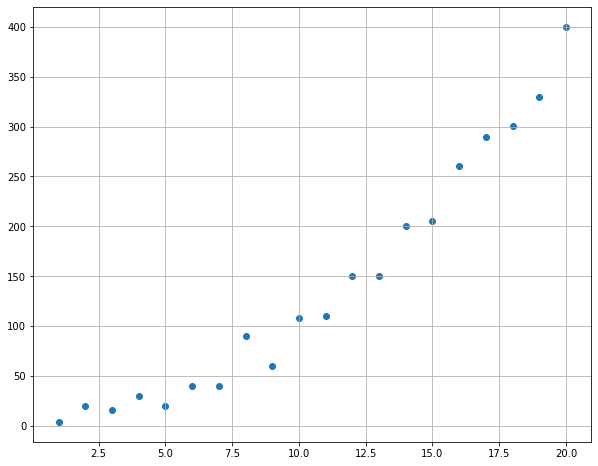

Bạn muốn chọn loại hàm nào: 
Hàm đa thức (nhấn 1)
Hàm lượng giác (nhấn 2)
Hàm mũ (nhấn 3)
1
Nhập bậc của hàm đa thức: 
1
Véc tơ beta thu được là: 
[-66.16315789  19.74887218]


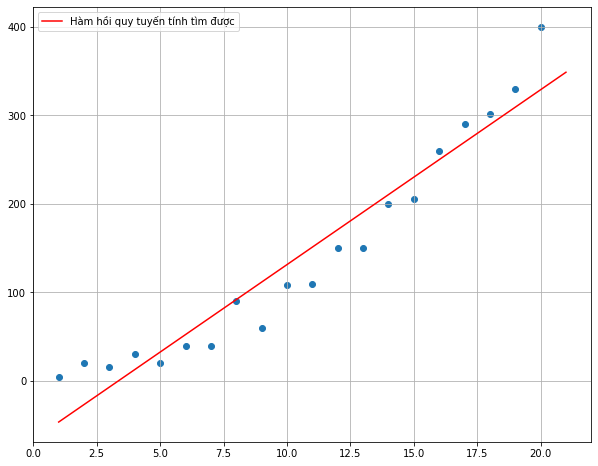

In [ ]:
beta = main(x, y)

- Thử xấp xỉ với một hàm bậc hai: 

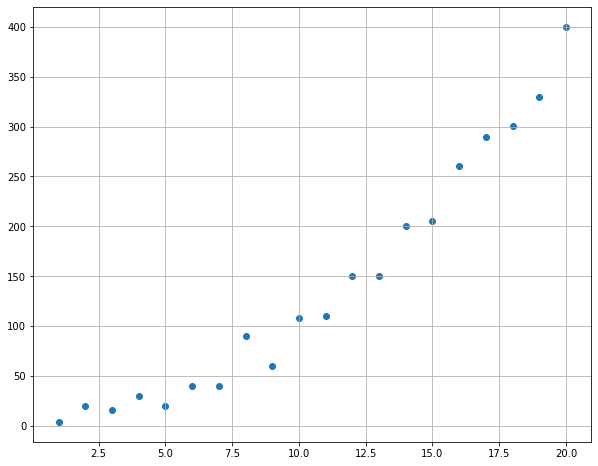

Bạn muốn chọn loại hàm nào: 
Hàm đa thức (nhấn 1)
Hàm lượng giác (nhấn 2)
Hàm mũ (nhấn 3)
1
Nhập bậc của hàm đa thức: 
2
Véc tơ beta thu được là: 
[11.02982456 -1.3037594   1.00250627]


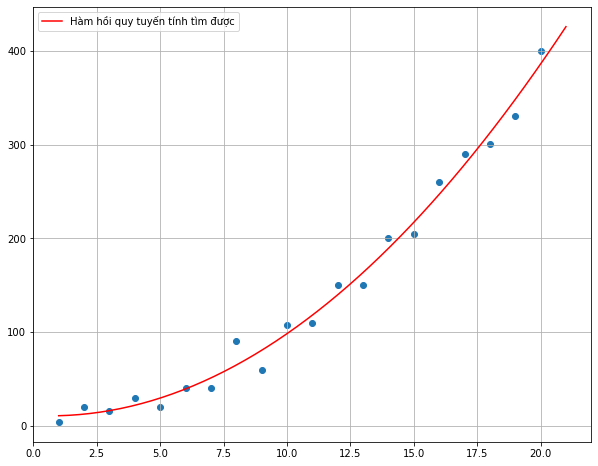

In [ ]:
beta = main(x, y)

- Thử xấp xỉ với một hàm bậc bốn: 

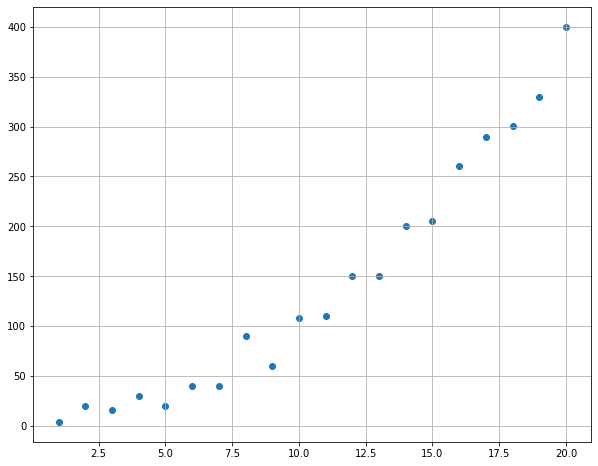

Bạn muốn chọn loại hàm nào: 
Hàm đa thức (nhấn 1)
Hàm lượng giác (nhấn 2)
Hàm mũ (nhấn 3)
1
Nhập bậc của hàm đa thức: 
4
Véc tơ beta thu được là: 
[ 1.01572497e+01 -1.02066035e+00  1.00978792e+00 -4.10727445e-03
  1.63606893e-04]


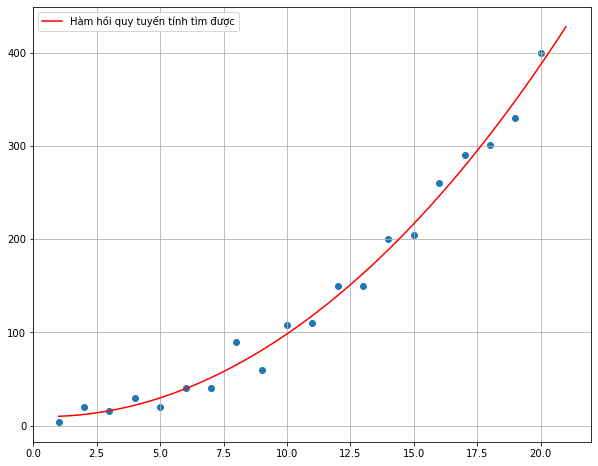

In [ ]:
beta = main(x, y)

## Ứng dụng 3: Tìm ma trận nghịch đảo của ma trận đối xứng và không đối xứng

## 3. 1. Tìm ma trận nghịch đảo của ma trận đối xứng 

### Cách 1: Equation Solving (Phương pháp ma trận nhân véc tơ)

**Ý tưởng**: 
- Ma trận A nhập vào phải là ma trận đối xứng và xác định dương. Ta có hệ: 
\begin{equation}
\mathbf{AX} = \mathbf{I}
\end{equation}
- Khi đó $\mathbf{X}$ chính là ma trận nghịch đảo của $\mathbf{A}$. 
- Ta lần lượt giải hệ: 
\begin{equation}
\mathbf{Ax}_i = \mathbf{I}_i \quad i = \overline{1, n} \qquad (2)
\end{equation}
- Ta có thể giải (2) bằng phương pháp giải hệ phương trình ở trên. Ta giải $n$ phương trình, thu được $n$ cột $x_i$ của ma trận $\mathbf{X}$. Thực hiện xong, ta thu được ma trận nghịch đảo $\mathbf{X}$. 

### Hàm tìm ma trận nghịch đảo bằng phương pháp ma trận nhân véc tơ. 

In [ ]:
def invEquaSol(A): 
    n = len(A)
    I = np.identity(n)
    invA = np.zeros((n, n))
    
    # Bước 1: Phân tách Cholesky của ma trận A
    U = ChoLKDecom(A)
    if type(U) == str: 
        return U
    L = U.T
    
    # Bươc 2: Giải từng cột của ma trận nghịch đảo. 
    for i in range(n): 
        invA[i] = linEqua(L, U, I[i])
        
    return invA

### Ví dụ 1: 

In [ ]:
A = np.array([[4, -2, 4, 2], 
              [-2, 10, -2, -7], 
              [4, -2, 8, 4], 
              [2, -7, 4, 7]])

In [ ]:
invEquaSol(A)

array([[ 0.63888889,  0.27777778, -0.41666667,  0.33333333],
       [ 0.27777778,  0.55555556, -0.33333333,  0.66666667],
       [-0.41666667, -0.33333333,  0.5       , -0.5       ],
       [ 0.33333333,  0.66666667, -0.5       ,  1.        ]])

- So sánh kết quả với hàm inv của thư viện numpy: 

In [ ]:
np.linalg.inv(A)

array([[ 0.63888889,  0.27777778, -0.41666667,  0.33333333],
       [ 0.27777778,  0.55555556, -0.33333333,  0.66666667],
       [-0.41666667, -0.33333333,  0.5       , -0.5       ],
       [ 0.33333333,  0.66666667, -0.5       ,  1.        ]])

- Nếu ta để ý kỹ thì chỉ cần giải nửa tam giác dưới (hoặc nửa trên) của ma trận khả nghịch là ok. $\mathbf{A}$ đối xứng, nên ma trận nghịch đảo của $\mathbf{A}$ cũng là ma trận đối xứng. Do đó, ta chỉ cần chỉnh lại một chút thuật toán ở trên để chỉ tính ma trận tam giác dưới (hoặc trên) của $\mathbf{X}$, rồi sau đó lấy phép đối xứng. 

### Cách 2: Triangular Matrix Operations (Phương pháp khai triển trực tiếp)

Ý tưởng thuật toán tìm ma trận nghịch đảo của $\mathbf{A}$, với $\mathbf{A}$ đối xứng, xác định dương: 
- Ta phân tách Cholesky:
$\mathbf{A} = \mathbf{L}\mathbf{L}^T \Rightarrow \mathbf{A}^{-1} = (\mathbf{L}^{T})^{-1}\mathbf{L}^{-1} = (\mathbf{L}^{-1})^T(\mathbf{L}^{-1})$
- Đặt $\mathbf{L}^{-1} = R \Rightarrow \mathbf{A}^{-1} = \mathbf{R}^T\mathbf{R}$. Vậy ta cần tìm $\mathbf{R} = \mathbf{L}^{-1}$ dựa vào ma trận $\mathbf{L}$ đã tìm được dựa vào phân tách Cholesky ở trên. 
- Công thức để xác định thuật toán: 
\begin{equation}
\mathbf{L}\mathbf{L}^{-1} = \mathbf{I}. 
\end{equation}
Có thể giải theo phương pháp *ma trận nhân véc tơ* ở trên (cách 1) hoặc dùng *phương pháp khai triển trực tiếp (direct method)*
- Phương pháp khai triển trực tiếp: viết dạng ma trận, tìm quy luật (thuật toán) tính các phần tử:
\begin{align}
\begin{bmatrix}
l_{11} & 0 & \cdots & 0 \\
l_{21} & l_{31} & \cdots & 0 \\
\vdots & \vdots & \ddots & 0 \\
l_{n1} & l_{n2} & \cdots & l_{nn} 
\end{bmatrix}
\begin{bmatrix}
l_{11}^* & 0 & \cdots & 0 \\
l_{21}^* & l_{31}^* & \cdots & 0 \\
\vdots & \vdots & \ddots & 0 \\
l_{n1}^* & l_{n2}^* & \cdots & l_{nn}^*
\end{bmatrix}
= 
\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & 0 \\
0 & 0 & \cdots & 1
\end{bmatrix} \qquad (*)
\end{align}
- Từ (*), ta suy ra thuật toán để tính các phần tử $\mathbf{l}_{ij}*$

### Hàm tính ma trận nghịch đảo của ma trận tam giác dưới bằng phương phương pháp khai triển trực tiếp. 

In [ ]:
def loTriInv(L):
    n = len(L)
    invL = np.zeros((n, n))
    
    for j in range(n): 
        invL[j][j] = 1 / L[j][j]
        
        for i in range(j + 1, n): 
            for k in range(j, i):
                invL[i][j] += L[i][k]*invL[k][j]
            
            invL[i][j] = -invL[i][j] / L[i][i]
            
    return invL 

Note: slicing chỉ dùng được với mảng một chiều và mảng hai chiều sử khi slicing hàng của nó. không dùng slicing cột được của mảng hai chiều. 

### Ví dụ 1: 

In [ ]:
L = np.array([[4, -0, 0, 0], 
              [-2, 10, 0, 0], 
              [4, -2, 8, 0], 
              [2, -7, 4, 7]], dtype='float')

In [ ]:
loTriInv(L)

- So sánh kết quả với hàm inv của numpy: 

In [ ]:
np.linalg.inv(L)

### Hàm thực thi chính - tính nghịch đảo của ma trận đối xứng xác định dương bằng phương pháp khai triển trực tiếp: 

In [ ]:
def invposdefMatrix(A): 
    # Bước 1: Phân tách Cholesky của A. 
    U = ChoLKDecom(A)
    if type(U) == str: 
        return U
    L = U.T
    
    # Bước 2: Tính ma trận nghịch đảo của ma trận tam giác dưới L. 
    invL = loTriInv(L)
    
    # Bước 3: Nhân invL với chuyển vị của chính nó. 
    invA = np.matmul(invL.T, invL) 
    
    return invA

### Ví dụ 1: 

In [ ]:
A = np.array([[4, -2, 4, 2], 
              [-2, 10, -2, -7], 
              [4, -2, 8, 4], 
              [2, -7, 4, 7]], dtype='float')

In [ ]:
invposdefMatrix(A)

array([[ 0.63888889,  0.27777778, -0.41666667,  0.33333333],
       [ 0.27777778,  0.55555556, -0.33333333,  0.66666667],
       [-0.41666667, -0.33333333,  0.5       , -0.5       ],
       [ 0.33333333,  0.66666667, -0.5       ,  1.        ]])

- So sánh kết quả với hàm inv của thư viện numpy: 

In [ ]:
np.linalg.inv(A)

array([[ 0.63888889,  0.27777778, -0.41666667,  0.33333333],
       [ 0.27777778,  0.55555556, -0.33333333,  0.66666667],
       [-0.41666667, -0.33333333,  0.5       , -0.5       ],
       [ 0.33333333,  0.66666667, -0.5       ,  1.        ]])

**Chú ý**: Ta cũng có thể tìm ma trận nghịch đảo với ma trận tam giác trên $\mathbf{U}$, cách làm tương tự như tìm nghịch đảo đối với ma trận tam giác dưới $\mathbf{L}$. 

## 3.2. Tìm ma trận nghịch đảo của ma trận thường dựa vào phân tách Cholesky 

**Nhắc lại về các định lý:** 
- Định lý 1: Nếu $\mathbf{A}$ là ma trận đối xứng, xác định dương thì $\mathbf{A}$ khả nghịch.\
    $\Rightarrow$ Hệ quả 1: Nếu $\mathbf{A}$ là ma trận xác định dương thì hệ $\mathbf{Ax} = b$ có duy nhất một nghiệm.
- Định lý 2: Cho $\mathbf{M} \in \mathbb{R}^{n \times n}$ là ma trận khả nghịch, và cho $\mathbf{A} = \mathbf{M}^T\mathbf{M}$. Khi đó $\mathbf{A}$ là ma trận xác định dương. 
- Định lý 3: Cho $\mathbf{A}$ là ma trận đối xứng xác định dương. Khi đó $\mathbf{A}$ có thể được phân tách một cách duy nhất thành tích của hai ma trận tam giác trên và dưới: 
\begin{equation}
\mathbf{A} = \mathbf{U}^T\mathbf{U}
\end{equation}

**Ý tưởng phương pháp:**
- Tìm nghịch đảo của $\mathbf{D} \in \mathbb{R}^{n \times n}$ với $\mathbf{D}$ là ma trận thường. 
- Nếu $\mathbf{D}$ khả nghịch thì chắc chắn có nghịch đảo. Ta nhân $\mathbf{D}$ với chuyển vị $\mathbf{D}^T$ của nó, thu được một ma trận trung gian:  
\begin{equation}
\mathbf{A} = \mathbf{D}^T\mathbf{D} \qquad (1) 
\end{equation}
- Khi đó chắc chắn $\mathbf{A}$ đối xứng, xác định dương (do định lý 1), do vậy $\mathbf{A}$ có phân tách Cholesky (định lý 3). 
- Lấy nghịch đảo của (1) ta được: 
\begin{align}
\mathbf{A}^{-1} &= \mathbf{D}^{-1}(\mathbf{D}^T)^{-1} \qquad (2) \\ 
\Rightarrow \mathbf{D}^{-1} &= \mathbf{A}^{-1}\mathbf{D}^T \qquad (3)
\end{align}
- Vậy ta cần tìm nghịch đảo của ma trận $\mathbf{A}$ là ma trận đối xứng, xác định dương. Ta đã có thuật toán ở trên. Tìm được $\mathbf{A}^{-1}$, thế vào (3) ta được $\mathbf{D}^{-1}$ là ma trận cần tìm. 
- Nếu không phân tách được Cholesky của $\mathbf{A}$ $ \Rightarrow \mathbf{A}$ không xác định dương $\Rightarrow \mathbf{D}$ không khả nghịch (định lý 2)  

### Hàm tìm ma trận nghịch đảo của ma trận thường. 

In [ ]:
def normalInvMatrix(D): 
    # Bước 1: Tạo một ma trận đối xứng trung gian. 
    A = np.matmul(D.T, D)
    
    # Bước 2 + Bước 3: Phân tách Cholesky của ma trận trung gian A + tìm ma trận nghịch đảo của A. 
    invA = invposdefMatrix(A)
    if type(invA) == str: 
        return ("Ma trận ban đầu không khả nghịch, do đó không có ma trận nghịch đảo.")
    
    # Bước 4: Tìm nghịch đảo của D:
    invD = np.matmul(invA, D.T)
    
    return invD

In [ ]:
D = np.array([[1, -3, 6, 2, -6], 
              [4, 3, 9, 5, 2], 
              [1, 7, -2, 4, 8], 
              [3, -2, 6, 4, 1], 
              [-3, 5, 2, -6, 1]], dtype='float')

In [ ]:
np.linalg.inv(D)

array([[-5.68252007e-01,  7.15256331e-01, -4.95985176e-01,
        -5.68869673e-01, -3.03273626e-01],
       [ 1.05003088e-02,  1.97652872e-01, -6.17665225e-04,
        -2.97096973e-01, -3.02655960e-02],
       [ 9.17232860e-02, -9.69734404e-02,  5.34280420e-02,
         1.98888203e-01,  1.17974058e-01],
       [ 3.11612106e-01, -2.52007412e-01,  2.75787523e-01,
         1.53798641e-01,  1.35886350e-02],
       [-7.10315009e-02, -1.60592959e-01,  6.30018530e-02,
         3.03891291e-01,  8.70907968e-02]])

In [ ]:
normalInvMatrix(D)

array([[-5.68252007e-01,  7.15256331e-01, -4.95985176e-01,
        -5.68869673e-01, -3.03273626e-01],
       [ 1.05003088e-02,  1.97652872e-01, -6.17665225e-04,
        -2.97096973e-01, -3.02655960e-02],
       [ 9.17232860e-02, -9.69734404e-02,  5.34280420e-02,
         1.98888203e-01,  1.17974058e-01],
       [ 3.11612106e-01, -2.52007412e-01,  2.75787523e-01,
         1.53798641e-01,  1.35886350e-02],
       [-7.10315009e-02, -1.60592959e-01,  6.30018530e-02,
         3.03891291e-01,  8.70907968e-02]])

## Ứng dụng 4: Tính định thức 

Cho một ma trận A là đối xứng, xác định dương. Ta tính định thức của A dựa vào phân tách Cholesky như sau:\
\begin{align}
det(\mathbf{A}) = det(\mathbf{U}^T.\mathbf{U}) = det(\mathbf{U}^T).det(\mathbf{U}) = \Sigma_{1}^{n}u_{ii}^2 \qquad(1)
\end{align}
- Để tính định thức của $\mathbf{M}$, ta nhân $\mathbf{M}$ với chuyển vị của nó. Ta được: 
\begin{equation}
\mathbf{A} = \mathbf{M}^T\mathbf{M} \qquad (2)
\end{equation}
- Tính $det(A)$ dựa vào (1). Từ (2) ta có: 
\begin{equation}
detA = det(\mathbf{M}^T\mathbf{M}) = det\mathbf{M}^T detM \qquad (3)
\end{equation}
- Ta dựa vào tính chất: 
\begin{equation}
det\mathbf{M}^T = det\mathbf{M} \qquad (4)
\end{equation}
- Ta suy ra: 
\begin{equation}
det\mathbf{M} = \sqrt{det\mathbf{A}} \qquad (5) 
\end{equation}

### Hàm tính định thức của ma trận dựa vào phân tách Cholesky: 

In [ ]:
def determnt(M): 
    flag = symmetryCheck(M)
    # TH1: Nếu M đối xứng. 
    if flag == True: 
    # Bước 1: Phân tách M = U^T.U 
        U = ChoLKDecom(M)
        if type(U) == str: 
            return "Không tính được định thức do A không xác định dương"
        
        # Nếu phân tách được, thì tính detM.
        n = len(U)
        detM = 1
        for i in range(n): 
            detM *= U[i][i] * U[i][i]
            
        return detM
        
    # TH2: Nếu M không đối xứng. 
    # Bước 1: Nhân M với chuyển vị của nó. 
    A = np.matmul(M.T, M)
    
    # Phân tách cholesky của A. 
    U = ChoLKDecom(A)
    
    # Nếu A không phân tách Cholesky được => M không khả nghịch => detM = 0. 
    if type(U) == str: 
        return "A không xác định dương => M không khả nghịch => det(M) = 0"
    
    # Nếu A phân tách được cholesky được => tính detA rồi suy ra detM. 
    n = len(U)
    detA = 1
    for i in range(n): 
        detA *= U[i][i] * U[i][i]
        
    detM = np.sqrt(detA)
    
    return detM

### Ví dụ 1: 

In [ ]:
A = np.array([[4, -2, 4, 2], 
              [-2, 10, -2, -7], 
              [4, -2, 8, 4], 
              [2, -7, 4, 7]], dtype ='float')

- Thực thi với hàm ta vừa định nghĩa ở trên: 

In [ ]:
determnt(A)

144.0

- So sánh kết quả với hàm det trong thư viện numpy: 

In [ ]:
np.linalg.det(A)

144.0

### Ví dụ 2: 

In [ ]:
D = np.array([[1, -3, 6, 2, 5], 
              [4, 3, 9, 5, 2], 
              [1, 7, -2, 4, 8], 
              [3, -2, 6, 4, 1], 
              [-3, 5, 2, -6, 1]], dtype='float')

In [ ]:
determnt(D)

707.9999999998817

In [ ]:
np.linalg.det(D)

708.0000000000006

### Ví dụ 3: 

In [ ]:
M = np.array([[10, 32, 43, 27, 61, 42, 90, 33, 74, 35], 
              [21, 32, 47, 21, 78, 31, 23, 45, 32, 17], 
              [12, 25, 34, 76, 20, 34, 43, 11, 51, 67], 
              [34, 45, 36, 74, 12, 29, 41, 65, 98, 12], 
              [16, 24, 64, 31, 72, 34, 45, 18, 39, 43], 
              [12, 24, 36, 87, 45, 57, 36, 92, 89, 35], 
              [45, 98, 37, 47, 21, 25, 68, 49, 34, 29], 
              [48, 24, 19, 29, 37, 76, 56, 19, 36, 98], 
              [17, 74, 81, 23, 45, 38, 76, 17, 91, 83], 
              [45, 44, 38, 71, 65, 24, 63, 75, 24, 25]], dtype='float')

In [ ]:
determnt(M)

2.3727348858157936e+17

In [ ]:
np.linalg.det(M)

2.3727348858157942e+17

## Ứng dụng 5: Mô phỏng Monte-Carlo

## Ứng dụng 6: Quy hoạch phi tuyến 